In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
# from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 추천
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### MovieLens 데이터 살펴보기

In [2]:
# 데이터를 읽어온다.
rating_data = pd.read_csv('data/ratings.dat', delimiter='::', header=None)
rating_data.columns = ['user_id', 'movie_id', 'rating', 'time']
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movie_data = pd.read_csv('data/movies.dat', delimiter='::', header=None, 
                         encoding='ISO-8859-1')

movie_data.columns = ['movie_id', 'title', 'genre']
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
user_data = pd.read_csv('data/users.dat', delimiter='::', header=None)
user_data.columns = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [9]:
movie_data.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [10]:
user_data.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

### 데이터 분석

#### 년대별 (1990, 1980년대..)별 영화 개수를 파악한다.

In [11]:
# 전체 영화의 개수
print(f'전체 영화의 개수 : {len(movie_data)}')

전체 영화의 개수 : 3883


In [12]:
# 중복된 데이터가 존재할 가능성이 있으므로 확인한다.
print(len(movie_data['movie_id'].unique()))

3883


In [13]:
# title 컬럼에서 영화 상영 년도를 가져온다.
a1 = movie_data['title'].str[-5:-1]

# year라는 컬럼으로 추가한다.
movie_data['year'] = a1
movie_data

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [14]:
# year 컬럼을 통해 년대를 구한다.
a1 = movie_data['year'].str[:-1] + '0'
movie_data['year_term'] = a1
movie_data

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [15]:
# 년대별 영화의 수를 가져온다.
movie_year_term = movie_data['year_term'].value_counts()
movie_year_term.sort_index(inplace=True)
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

In [16]:
movie_year_term = movie_data.groupby('year_term')['movie_id'].count()
movie_year_term

year_term
1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: movie_id, dtype: int64

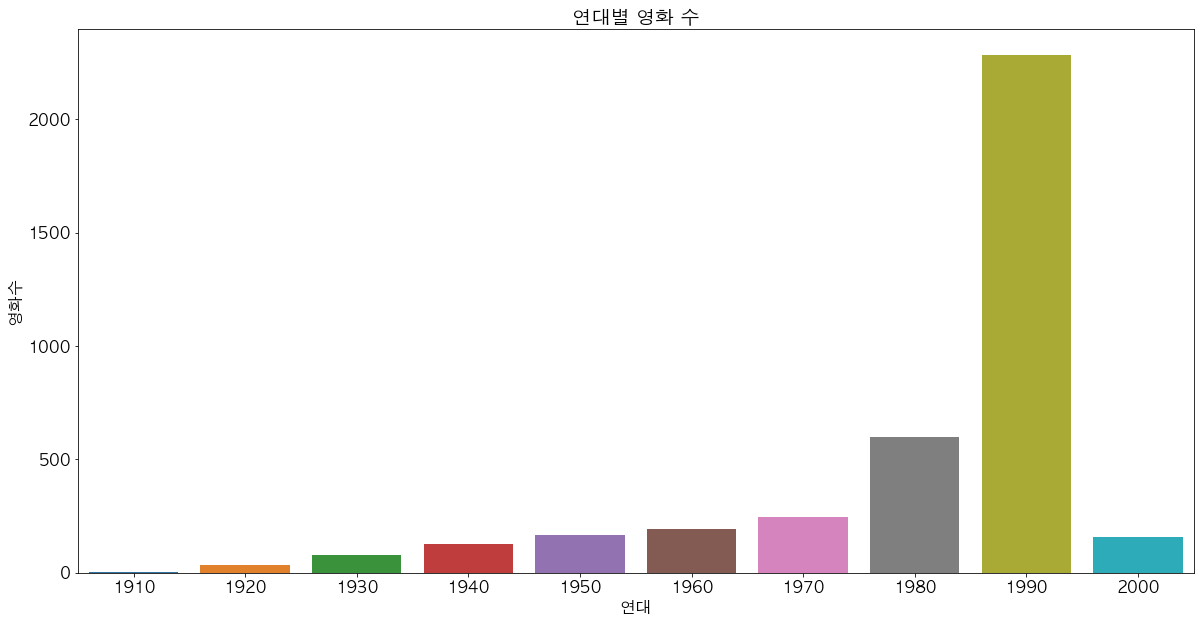

In [17]:
x = movie_year_term.index
y = movie_year_term.values

sns.barplot(x, y)
plt.title('연대별 영화 수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

### 장르별 속성 탐색

In [18]:
movie_data['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

In [19]:
# 장르들을 담을 리스트
genre_list = []

# 영화의 수 만큼 반복한다.
for row in movie_data['genre'] :
    # print(row)
    
    # | 를 기준으로 잘라낸다.
    a1 = row.split('|')
    # print(a1)
    
    # 리스트에 누적한다.
    genre_list.extend(a1)
    
# genre_list

In [20]:
# Series로 생성한다.
s1 = pd.Series(genre_list)
# 장르별 영화수를 확인한다.
unique_genre = s1.value_counts()
unique_genre

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

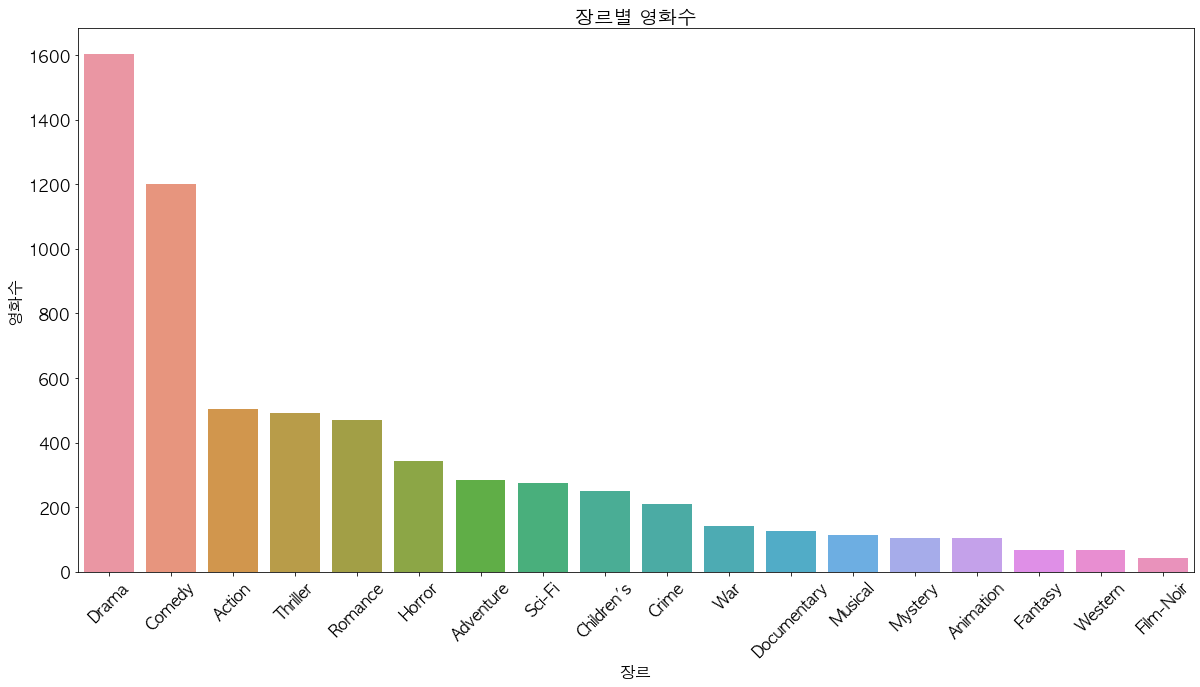

In [21]:
x = unique_genre.index
y = unique_genre.values

sns.barplot(x, y)
plt.title('장르별 영화수')
plt.xlabel('장르')
plt.ylabel('영화수')
plt.xticks(rotation=45)
plt.show()

### 사용자의 성별 수를 그래프로 시각화 한다.

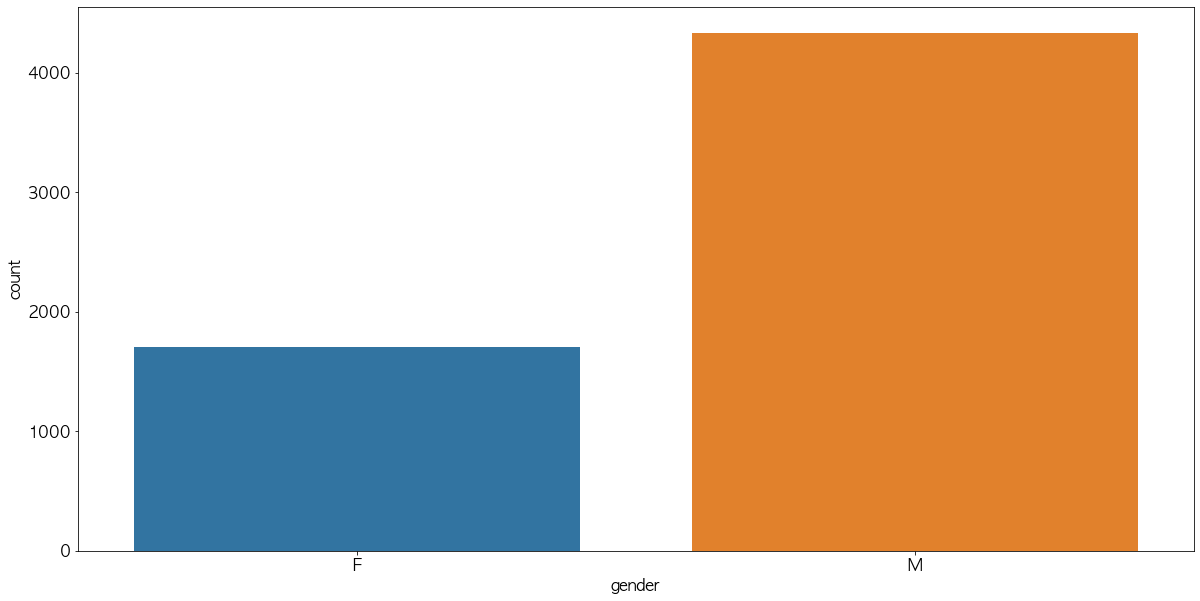

In [22]:
sns.countplot(data=user_data, x='gender')
plt.show()

### 연령대별 (10, 20, 30대..)사용자 수를 그래프로 시각화한다.

In [23]:
# age 컬럼이 숫자인지 확인한다.
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [24]:
# 연령대를 구한다.
user_data['ages'] = user_data['age'] // 10 * 10
user_data

,user_id,gender,age,occupation,zipcode,ages
0,1,F,1,10,48067,0
1,2,M,56,16,70072,50
2,3,M,25,15,55117,20
3,4,M,45,7,02460,40
4,5,M,25,20,55455,20
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,20
6036,6037,F,45,1,76006,40
6037,6038,F,56,1,14706,50
6038,6039,F,45,0,01060,40


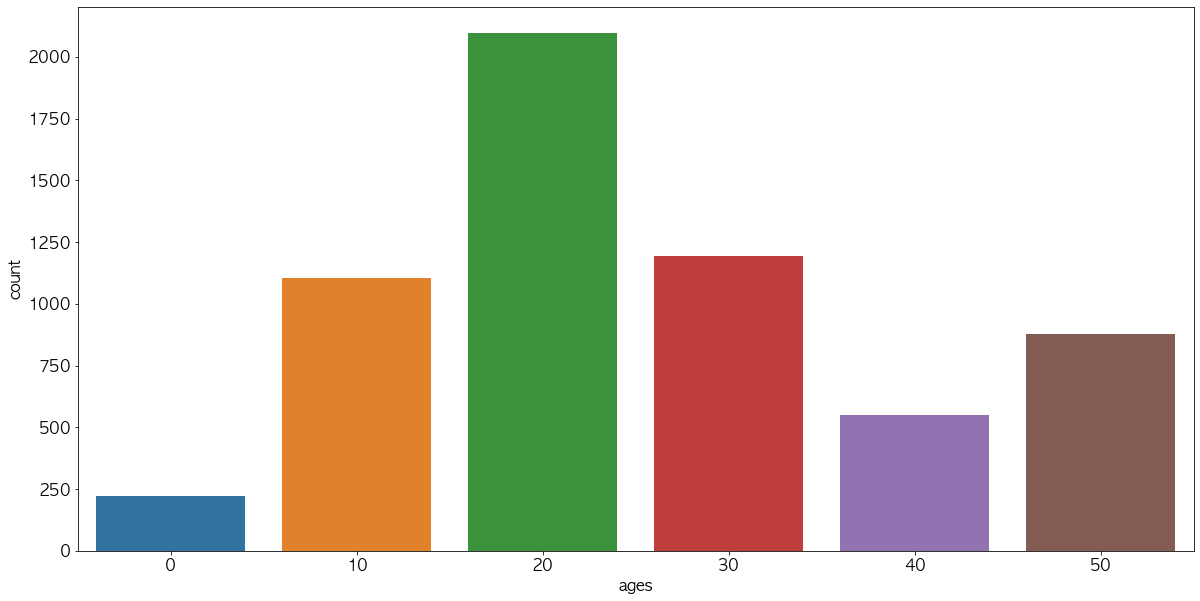

In [25]:
sns.countplot(data=user_data, x='ages')
plt.show()

### Suprise 사용해보기
- 대표적인 추천 알고리즘
- 사용자번호, 상품번호, 평점기반의 데이터를 학습하여 각 사용자간 유사성을 분석해 상품을 추천하는 알고리즘
- 사용하기가 매우 간단하고 아마존 추천 알고리즘을 기반으로 하고 있다.

In [26]:
# 테스트용 데이터 프레임을 생성한다.
rating_dict = {
    'item_id' : [1, 2, 3, 1, 2, 3, 2],
    'user_id' : ['a', 'a', 'a', 'b', 'b', 'b', 'c'],
    'rating' : [2, 4, 4, 2, 5, 4, 5]
}

df = pd.DataFrame(rating_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [27]:
# surprise는 사용자구분값, 사용자 구분값, 평점으로 구성된 데이터를 사용한다.
# 사용자 구분값은 user_id, 상품구분값은 item_id, 평점은 rating이라는
# 이름으로 되어 있여야 하며 user_id, item_id, rating 순으로 되어 있어야 한다.

# surprise 에서 사용하즌 구조로 변경한다.
# 사용자id, 상품id, 평점 순으로 변경한다.
a1 = df[['user_id', 'item_id', 'rating']]
a1

,user_id,item_id,rating
0,a,1,2
1,a,2,4
2,a,3,4
3,b,1,2
4,b,2,5
5,b,3,4
6,c,2,5


In [28]:
# 데이터를 읽어들일 reader를 생성한다.
# surprise 라이브러리가 인식할 수 있는 학습 데이터셋 구성
# rating_scale : 평점의 최소 최대값을 설정
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df=a1, reader=reader)
data

In [29]:
# 학습용 데이터를 생성한다.
train_data = data.build_full_trainset()
train_data

In [30]:
# SVD 모델을 통해 학습한다.
model = SVD()
model.fit(train_data)

In [31]:
# 비어 있는 곳의 평점을 예측한다.
# 본 데이터에서는 a 사용자가 1, 2, 3 상품에 대해 평점이 있고
# b 사용자가 1, 2, 3 상품에 대한 평점이 있다.
# 그리고 c  사용자가 2 상품에 대한 평점만 있으므로 c 사용자에 대한
# 1, 3 상품의 평점을 예측하게 된다.
# 이 때, c 사용자가 2 상품에 대한 평점이 있으므로 다른 사용자와 2 상품의
# 평점의 유사성 정도를 파악해 다른 상품의 평점을 예측하게 된다.

test_data = train_data.build_anti_testset()
predition = model.test(test_data)
predition

[Prediction(uid='c', iid=1, r_ui=3.7142857142857144, est=3.4270207703288995, details={'was_impossible': False}),
 Prediction(uid='c', iid=3, r_ui=3.7142857142857144, est=3.967553782481062, details={'was_impossible': False})]

In [32]:
for uid, iid, r_ui, est, details in predition :
    print(f'사용자 : {uid}')
    print(f'상품번호 : {iid}')
    print(f'예측평점 : {est}')
    print('------------------------')

사용자 : c
상품번호 : 1
예측평점 : 3.4270207703288995
------------------------
사용자 : c
상품번호 : 3
예측평점 : 3.967553782481062
------------------------


### MovieLens 데이터 사용

In [33]:
# 평점 정보 확인
rating_data['rating'].agg(['min', 'max'])

min    1
max    5
Name: rating, dtype: int64

In [34]:
# reader 생성
reader = Reader(rating_scale=(1, 5))
# 데이터를 생성한다.
a1 = rating_data[['user_id', 'movie_id', 'rating']]
a1

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [35]:
# 데이터를 생성한다.
data = Dataset.load_from_df(a1, reader)
train_data = data.build_full_trainset()
train_data

In [36]:
# 학습한다.
model = SVD()
model.fit(train_data)

### 예측할 사용자를 선정

In [37]:
# user_id가 4인 유저의 영화 평가 데이터
target_user_id = 4
target_user_data = rating_data.query('user_id == @target_user_id')
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [38]:
# 4번 사용자가 보지 않은 영화 인덱스를 담아준다.
test_data = []

# 4번 사용자가 본 영화 인덱스를 추출한다.
a1 = target_user_data['movie_id'].values

# 영화의 수 만큼 반복하면서 영화 id를 가져온다.
for movie_id in movie_data['movie_id'] :
    # 영화 id가 4번 사용자가 본 영화가 아니라면 담는다.
    if movie_id not in a1 :
        test_data.append((target_user_id, movie_id, 0))
        
test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [39]:
# 평점을 예측한다.
target_user_predictions = model.test(test_data)
target_user_predictions

[Prediction(uid=4, iid=1, r_ui=0, est=4.133825995148051, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.4784336888411933, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.9486073409638696, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.143957795825566, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=3.3255071848662983, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.226253408421815, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.662326086670115, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.2653667814359264, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.7254504639812196, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.483239643248712, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.8742491594605237, detai

In [40]:
# 상위 10개의 데이터를 가져온다.
# 예측된 점수를 담을 딕셔너리
predict_dict = {
    'movie_id' : [],
    'rating' : []
}

# 데이터를 추출해 담는다.
for _, movie_id, _, rating, _ in target_user_predictions :
    predict_dict['movie_id'].append(movie_id)
    predict_dict['rating'].append(rating)
    
predict_df = pd.DataFrame(predict_dict)
predict_df.sort_values(by='rating', inplace=True, ascending=False)
predict_df

,movie_id,rating
314,318,5.000000
2821,2905,4.914433
521,527,4.808887
845,858,4.775400
1158,1178,4.737971
...,...,...
3709,3799,1.884460
540,546,1.871716
798,810,1.813663
1748,1826,1.781769


In [41]:
# 상위 10개를 가져온다.
a2 = predict_df.head(10)
a2

,movie_id,rating
314,318,5.000000
2821,2905,4.914433
521,527,4.808887
845,858,4.775400
1158,1178,4.737971
1182,1207,4.736924
733,745,4.720336
1938,2019,4.715837
1232,1262,4.715372
1327,1358,4.709164


In [42]:
# 상위 10개를 반복한다.
for mid in a2['movie_id'] :
    # 영화 제목을 가져온다.
    idx1 = movie_data.query('movie_id == @mid').index
    movie_title = movie_data.loc[idx1, 'title']

    # 평점 정보를 가져온다.
    idx2 = a2.query('movie_id == @mid').index
    movie_rating = a2.loc[idx2, 'rating']
    
    print(f'영화제목 : {movie_title.values[0]}')
    print(f'예상평점 : {movie_rating.values[0]}')
    print('--------------------------------------')

영화제목 : Shawshank Redemption, The (1994)
예상평점 : 5.0
--------------------------------------
영화제목 : Sanjuro (1962)
예상평점 : 4.914433451227838
--------------------------------------
영화제목 : Schindler's List (1993)
예상평점 : 4.808886697445659
--------------------------------------
영화제목 : Godfather, The (1972)
예상평점 : 4.775400431830649
--------------------------------------
영화제목 : Paths of Glory (1957)
예상평점 : 4.73797055249547
--------------------------------------
영화제목 : To Kill a Mockingbird (1962)
예상평점 : 4.73692362026725
--------------------------------------
영화제목 : Close Shave, A (1995)
예상평점 : 4.72033610957216
--------------------------------------
영화제목 : Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
예상평점 : 4.715837499366919
--------------------------------------
영화제목 : Great Escape, The (1963)
예상평점 : 4.71537208517781
--------------------------------------
영화제목 : Sling Blade (1996)
예상평점 : 4.709163550309804
--------------------------------------


### 연습문제

- 각 사용자별 평점 평균을 구한다.

In [43]:
# 사용자를 기준으로 그룹을 묶고 평점 평균을 구한다.
a1 = rating_data.groupby('user_id')['rating'].mean()
a1

user_id
1       4.188679
2       3.713178
3       3.901961
4       4.190476
5       3.146465
          ...   
6036    3.302928
6037    3.717822
6038    3.800000
6039    3.878049
6040    3.577713
Name: rating, Length: 6040, dtype: float64

In [44]:
# 평점 평균을 기준으로 정렬한다.
a1.sort_values(inplace=True, ascending=False)
a1

user_id
283     4.962963
2339    4.956522
3324    4.904762
3902    4.890909
446     4.843137
          ...   
5850    1.844828
4539    1.815126
2744    1.304348
4486    1.058824
3598    1.015385
Name: rating, Length: 6040, dtype: float64

In [45]:
# 상위 10개를 가져온다.
a2 = a1.head(10)
a2

user_id
283     4.962963
2339    4.956522
3324    4.904762
3902    4.890909
446     4.843137
447     4.837838
4649    4.818182
4634    4.813725
1131    4.796117
4925    4.761905
Name: rating, dtype: float64

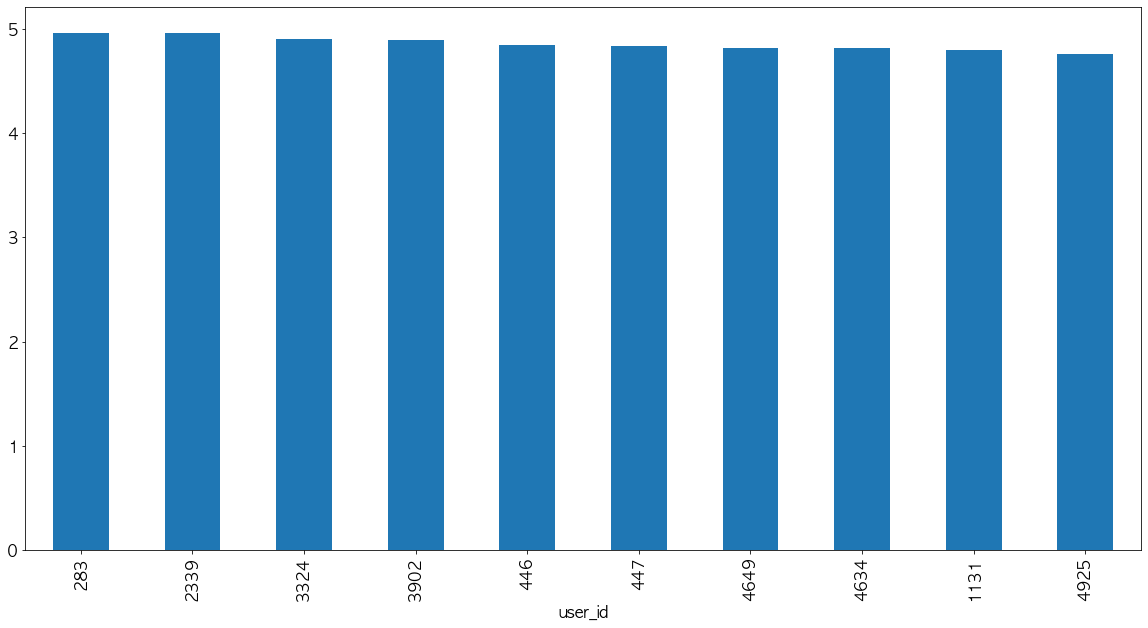

In [46]:
a2.plot.bar()
plt.show()

- 각 영화별 평점 평균을 구한다.

In [47]:
# 두 데이터 프레임을 합쳐준다.
# rating_data에서 left_on에 명시된 컬럼과 movie_data에서 right_on에 
# 명시된 컬럼의 값이 같은 것 끼리 매칭 시켜서 합쳐준다
a100 = rating_data.merge(movie_data, left_on='movie_id', right_on='movie_id')
a100

,user_id,movie_id,rating,time,title,genre,year,year_term
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary,1998,1990
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama,1998,1990
1000206,5780,2845,1,958153068,White Boys (1999),Drama,1999,1990
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,1973,1970


In [48]:
# 영화를 기준으로 그룹을 묶고 평점 평균을 구한다.
a1 = a100.groupby('title')['rating'].mean()
a1

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [49]:
# 평점 평균을 기준으로 그룹을 묶는다.
a1.sort_values(inplace=True, ascending=False)
a1

title
Ulysses (Ulisse) (1954)                                       5.0
Lured (1947)                                                  5.0
Follow the Bitch (1998)                                       5.0
Bittersweet Motel (2000)                                      5.0
Song of Freedom (1936)                                        5.0
                                                             ... 
Fantastic Night, The (La Nuit Fantastique) (1949)             1.0
Cheetah (1989)                                                1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Mutters Courage (1995)                                        1.0
Windows (1980)                                                1.0
Name: rating, Length: 3706, dtype: float64

In [50]:
# 상위 10개를 가져온다.
a2 = a1.head(10)
a2

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

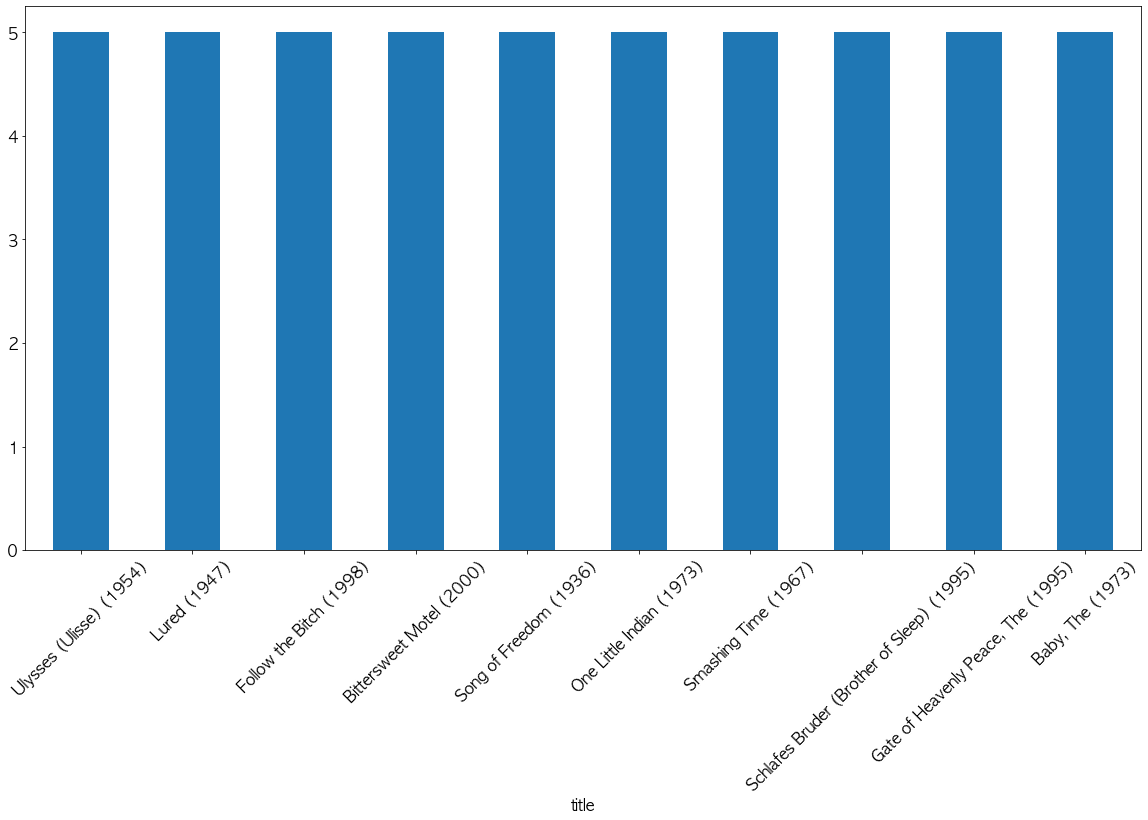

In [51]:
a2.plot.bar()
plt.xticks(rotation=45)
plt.show()

- 남자들의 영화 평점 평균을 구한다.

In [52]:
# user_data와 rating_data를 합쳐준다.
a1 = user_data.merge(rating_data, left_on='user_id', right_on='user_id')
a1

,user_id,gender,age,occupation,zipcode,ages,movie_id,rating,time
0,1,F,1,10,48067,0,1193,5,978300760
1,1,F,1,10,48067,0,661,3,978302109
2,1,F,1,10,48067,0,914,3,978301968
3,1,F,1,10,48067,0,3408,4,978300275
4,1,F,1,10,48067,0,2355,5,978824291
...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,20,1091,1,956716541
1000205,6040,M,25,6,11106,20,1094,5,956704887
1000206,6040,M,25,6,11106,20,562,5,956704746
1000207,6040,M,25,6,11106,20,1096,4,956715648


In [53]:
# 성별이 남자인 것을 가져온다.
a2 = a1.query('gender == "M"')
a2

,user_id,gender,age,occupation,zipcode,ages,movie_id,rating,time
53,2,M,56,16,70072,50,1357,5,978298709
54,2,M,56,16,70072,50,3068,4,978299000
55,2,M,56,16,70072,50,1537,4,978299620
56,2,M,56,16,70072,50,647,3,978299351
57,2,M,56,16,70072,50,2194,4,978299297
...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,20,1091,1,956716541
1000205,6040,M,25,6,11106,20,1094,5,956704887
1000206,6040,M,25,6,11106,20,562,5,956704746
1000207,6040,M,25,6,11106,20,1096,4,956715648


In [54]:
# 평점 평균을 구한다.
a2['rating'].mean()

3.5688785290984373

- 여자들의 영화 평점 평균을 구한다.

In [55]:
# user_data와 rating_data를 합친다.
a1 = user_data.merge(rating_data, left_on='user_id', right_on='user_id')
a1

,user_id,gender,age,occupation,zipcode,ages,movie_id,rating,time
0,1,F,1,10,48067,0,1193,5,978300760
1,1,F,1,10,48067,0,661,3,978302109
2,1,F,1,10,48067,0,914,3,978301968
3,1,F,1,10,48067,0,3408,4,978300275
4,1,F,1,10,48067,0,2355,5,978824291
...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,20,1091,1,956716541
1000205,6040,M,25,6,11106,20,1094,5,956704887
1000206,6040,M,25,6,11106,20,562,5,956704746
1000207,6040,M,25,6,11106,20,1096,4,956715648


In [56]:
# 여성의 데이터를 가져온다.
a2 = a1.query('gender == "F"')
a2

,user_id,gender,age,occupation,zipcode,ages,movie_id,rating,time
0,1,F,1,10,48067,0,1193,5,978300760
1,1,F,1,10,48067,0,661,3,978302109
2,1,F,1,10,48067,0,914,3,978301968
3,1,F,1,10,48067,0,3408,4,978300275
4,1,F,1,10,48067,0,2355,5,978824291
...,...,...,...,...,...,...,...,...,...
999863,6039,F,45,0,01060,40,1081,4,956705989
999864,6039,F,45,0,01060,40,1083,3,956706051
999865,6039,F,45,0,01060,40,1086,4,956706182
999866,6039,F,45,0,01060,40,1088,4,956706019


In [57]:
# 평점 평균을 구한다.
a2['rating'].mean()

3.6203660120110372

- 장르가 Comedy인 영화의 평점 평균을 구한다.

In [58]:
a1 = movie_data.merge(rating_data, left_on='movie_id', right_on='movie_id')
a1

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5927,1,979852537


In [59]:
# 장르가 Comedy를 포함하고 있는 행들을 가져온다.
a2 = a1['genre'].str.contains('Comedy')
a3 = a1[a2]
a3

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
999418,3948,Meet the Parents (2000),Comedy,2000,2000,5938,4,1002297887
999419,3948,Meet the Parents (2000),Comedy,2000,2000,5949,2,985052813
999420,3948,Meet the Parents (2000),Comedy,2000,2000,5950,4,1046369637
999421,3948,Meet the Parents (2000),Comedy,2000,2000,5972,2,986916093


In [60]:
a3['rating'].mean()

3.522098827752538

- 1990년대에 제작된 영화의 평점을 구한다.

In [61]:
# movie_data와 rating_data 를 합친다.
a1 = movie_data.merge(rating_data, left_on='movie_id', right_on='movie_id')
a1

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5927,1,979852537


In [62]:
# 1990년대 영화만 가져온다.
a2 = a1.query('year_term == "1990"')
a2

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
998253,3942,Sorority House Massacre II (1990),Horror,1990,1990,2491,1,974132390
998254,3942,Sorority House Massacre II (1990),Horror,1990,1990,2635,5,973588747
998255,3942,Sorority House Massacre II (1990),Horror,1990,1990,2694,4,973313181
998256,3942,Sorority House Massacre II (1990),Horror,1990,1990,4260,2,972109348


In [63]:
a2['rating'].mean()

3.4667303502157294